<a href="https://www.kaggle.com/code/sergiocfs/advanced-analysis-of-the-country-wise-latest-csv?scriptVersionId=209064121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Advanced Analysis of the "country_wise_latest.csv" Dataset

## 1. Introduction

The COVID-19 pandemic has had an unprecedented impact on global health, economies, and societies. This analysis aims to explore the “country_wise_latest.csv” dataset to extract meaningful insights about the pandemic’s spread, mortality rates, and recovery patterns across different countries. By utilizing advanced data analysis techniques, statistical methods, and machine learning models, we seek to understand the underlying factors affecting COVID-19 outcomes and provide recommendations for future policy-making and research.

## 2. Importing Necessary Libraries

In [1]:
# Data manipulation and analysis
import numpy as np 
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import pearsonr, ttest_ind

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## 3. Loading and Initial Exploration of the Dataset

- We load the dataset and display the initial entries to understand the data's structure and variables
- Observing the columns helps in planning the subsequente analysis steps

In [2]:
# Load the dataset
df = pd.read_csv('../input/corona-virus-report/country_wise_latest.csv')

display(df.head())
print()
display(df.info())

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    o

None

## 4. Data Preprocessing

### 4.1 Hnadling Missing Values

- Identifying missing values is crucial for data integrity.
- We ensure that any missing data is appropriately handled before analysis

In [3]:
# Check for missing values
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [4]:
# For the sake of this dataset, let's drop rows with missing values
df.dropna(inplace=True)

### 4.2 Data Cleaning

- Renaming columns makes them easier to reference
- Converting percentage columns to numeric types ensures accurate computations.
- Data type verification confirms that all columns are in the correct format

In [5]:
# Rename columns for consistency
df.rename(columns={'Country/Region': 'Country',
                  'Deaths / 100 Cases': 'Death Rate (%)',
                  'Recovered / 100 Cases': 'Recovery Rate (%)',
                  '1 week % increase': 'Weekly Increase (%)'}, inplace=True)

# Convert percentage columns to numeric
percentage_cols = ['Death Rate (%)', 'Recovery Rate (%)', 'Weekly Increase (%)']
for col in percentage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify data types
df.dtypes

Country                    object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Death Rate (%)            float64
Recovery Rate (%)         float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
Weekly Increase (%)       float64
WHO Region                 object
dtype: object

## 5 Exploratory Data Analysis (EDA)

### 5.1 Descriptive Statistics

-The `.descibe()` method provides a statistical summary, including mean, median, standard deviation, and quartiles
- Transposing the result `.T` makes it more readable

In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3.497519e+03,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,5.063148e+04,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,3.400194e+04,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1.222957e+03,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,2.895722e+01,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,9.338128e+02,4197.719635,0.00,0.000,22.00,221.000,33728.00
Death Rate (%),187.0,3.019519e+00,3.454302,0.00,0.945,2.15,3.875,28.56
Recovery Rate (%),187.0,6.482053e+01,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,inf,NaN,0.00,1.450,3.62,6.440,inf


### 5.2 Visualization of Key Variables

#### 5.2.1 Top 10 Countries by Confirmed Cases

- We identify countries with the highest number of confirmed cases.
- Visualizing this data highlights the most affected regions

In [7]:
# Top 10 countries

top_confirmed = df.nlargest(10, 'Confirmed')
display(top_confirmed)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Rate (%),Recovery Rate (%),Deaths / 100 Recovered,Confirmed last week,1 week change,Weekly Increase (%),WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


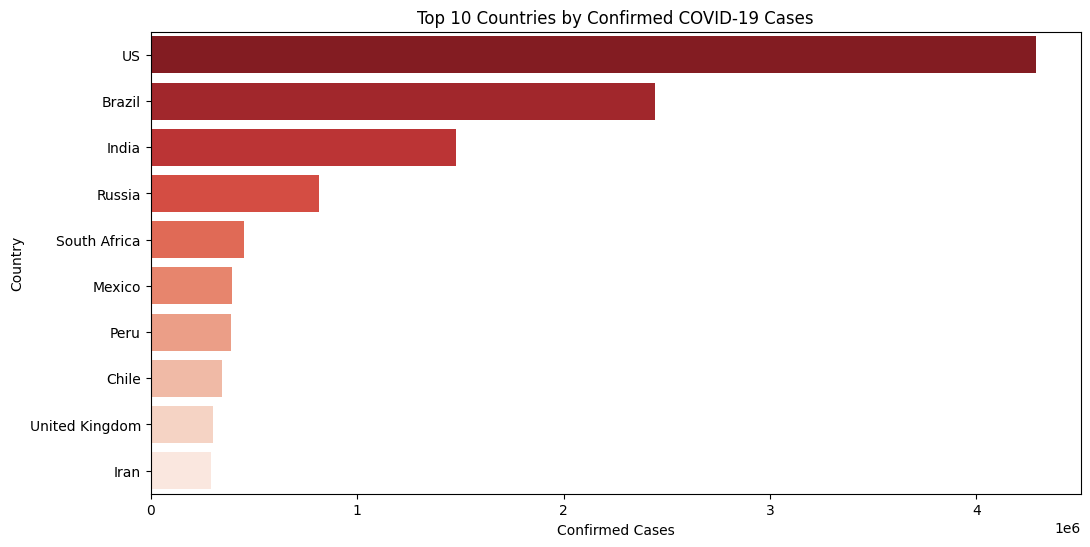

In [8]:
# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y = 'Country', data=top_confirmed, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()